# Assignment 7: Data Curation and Analysis
EJH2783 - Ethan Howard

**We will be utilizing box office data to determine the changes in ticket price over the course of a decade**

This box office data was retrived manually in accordance with "The Numbers"' data usage requirements as listed on their Data Services webpage. This project is strictly for academic purposes and is *not* intended for commercial purposes of any kind.

Relevant guidelines can be found here: https://www.the-numbers.com/data-services

# Step 1: Data extraction

In [275]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import

try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


In [276]:
# Define an empty list where the data will be kept
raw_data = []

import os
notebook_path = os.path.abspath("RawMovieData.txt")
with open(notebook_path) as file:
    table = [line.rstrip() for line in file]

for row in table:
    line_list = []
    line = row.strip().split("\t")
    for section in line:
        if(section != ""):
            line_list.append(section)
    raw_data.append(line_list)

print(raw_data)

[['Rank', 'Movie', 'Release Date', 'Distributor', 'Genre', 'Year Gross', 'Tickets Sold'], ['1', 'Star Wars Ep. V: The Empire...', 'May 21, 1980', '20th Century Fox', 'Adventure', '$181,353,855', '67,417,790'], ['2', 'Stir Crazy', 'Dec 12, 1980', 'Columbia', 'Comedy', '$101,300,000', '37,657,992'], ['3', 'Kramer vs. Kramer', 'Dec 19, 1979', 'Columbia', 'Drama', '$98,982,763', '36,796,566'], ['4', 'Airplane!', 'Jul 4, 1980', 'Paramount Pictures', 'Comedy', '$83,453,539', '31,023,620'], ['5', 'Any Which Way You Can', 'Dec 17, 1980', 'Warner Bros.', 'Comedy', '$70,687,344', '26,277,823'], ['6', 'Private Benjamin', 'Oct 10, 1980', 'Warner Bros.', 'Comedy', '$69,847,348', '25,965,556'], ['7', "Coal Miner's Daughter", 'Mar 7, 1980', 'Universal', 'Drama', '$67,182,787', '24,975,013'], ['8', 'Smokey and the Bandit II', 'Aug 15, 1980', 'Universal', 'Comedy', '$66,132,626', '24,584,619'], ['9', 'The Blues Brothers', 'Jun 20, 1980', 'Universal', 'Musical', '$57,229,890', '21,275,052'], ['10', 'Ord

# Step 2: Data transformation and load

In [277]:
raw_data_frame = pandas.DataFrame(raw_data)

# Print a few elements in the dataframe
raw_data_frame.head()

,0,1,2,3,4,5,6
0,Rank,Movie,Release Date,Distributor,Genre,Year Gross,Tickets Sold
1,1,Star Wars Ep. V: The Empire...,"May 21, 1980",20th Century Fox,Adventure,"$181,353,855","67,417,790"
2,2,Stir Crazy,"Dec 12, 1980",Columbia,Comedy,"$101,300,000","37,657,992"
3,3,Kramer vs. Kramer,"Dec 19, 1979",Columbia,Drama,"$98,982,763","36,796,566"
4,4,Airplane!,"Jul 4, 1980",Paramount Pictures,Comedy,"$83,453,539","31,023,620"


In [278]:
processed_data = [row for row in raw_data]

for i in range(len(processed_data)-1):
    if (processed_data[i+1] != []):
        processed_data[i+1][2] = int(processed_data[i+1][2][-4:])
        processed_data[i+1][0] = int(processed_data[i+1][0])
        
        processed_data[i+1][-1] = int(processed_data[i+1][-1].replace(",",""))
        processed_data[i+1][-2] = int(processed_data[i+1][-2][1:].replace(",",""))
        print(processed_data[i+1])
        
final_data = pandas.DataFrame(processed_data)

[1, 'Star Wars Ep. V: The Empire...', 1980, '20th Century Fox', 'Adventure', 181353855, 67417790]
[2, 'Stir Crazy', 1980, 'Columbia', 'Comedy', 101300000, 37657992]
[3, 'Kramer vs. Kramer', 1979, 'Columbia', 'Drama', 98982763, 36796566]
[4, 'Airplane!', 1980, 'Paramount Pictures', 'Comedy', 83453539, 31023620]
[5, 'Any Which Way You Can', 1980, 'Warner Bros.', 'Comedy', 70687344, 26277823]
[6, 'Private Benjamin', 1980, 'Warner Bros.', 'Comedy', 69847348, 25965556]
[7, "Coal Miner's Daughter", 1980, 'Universal', 'Drama', 67182787, 24975013]
[8, 'Smokey and the Bandit II', 1980, 'Universal', 'Comedy', 66132626, 24584619]
[9, 'The Blues Brothers', 1980, 'Universal', 'Musical', 57229890, 21275052]
[10, 'Ordinary People', 1980, 'Paramount Pictures', 'Drama', 52302978, 19443486]
[1, 'Raiders of the Lost Ark', 1981, 'Paramount Pictures', 'Adventure', 168425367, 60584664]
[2, 'Superman II', 1981, 'Warner Bros.', 'Adventure', 108185706, 38915721]
[3, 'Nine to Five', 1980, '20th Century Fox', 'C

In [279]:
column_names = ['Rank', 'Movie', 'Release Date', 
                'Distributor', 'Genre', 
                'Year Gross', 'Tickets Sold']

co_data = []

for li in raw_data[1:]:
    if(len(li) > 1):
        row = {}
        for i in range(len(column_names)):
            row[column_names[i]] = li[i]
        co_data.append(row)
        
final_data = co_data

print(final_data) 

[{'Rank': 1, 'Movie': 'Star Wars Ep. V: The Empire...', 'Release Date': 1980, 'Distributor': '20th Century Fox', 'Genre': 'Adventure', 'Year Gross': 181353855, 'Tickets Sold': 67417790}, {'Rank': 2, 'Movie': 'Stir Crazy', 'Release Date': 1980, 'Distributor': 'Columbia', 'Genre': 'Comedy', 'Year Gross': 101300000, 'Tickets Sold': 37657992}, {'Rank': 3, 'Movie': 'Kramer vs. Kramer', 'Release Date': 1979, 'Distributor': 'Columbia', 'Genre': 'Drama', 'Year Gross': 98982763, 'Tickets Sold': 36796566}, {'Rank': 4, 'Movie': 'Airplane!', 'Release Date': 1980, 'Distributor': 'Paramount Pictures', 'Genre': 'Comedy', 'Year Gross': 83453539, 'Tickets Sold': 31023620}, {'Rank': 5, 'Movie': 'Any Which Way You Can', 'Release Date': 1980, 'Distributor': 'Warner Bros.', 'Genre': 'Comedy', 'Year Gross': 70687344, 'Tickets Sold': 26277823}, {'Rank': 6, 'Movie': 'Private Benjamin', 'Release Date': 1980, 'Distributor': 'Warner Bros.', 'Genre': 'Comedy', 'Year Gross': 69847348, 'Tickets Sold': 25965556}, {'

In [280]:
final_data = pandas.DataFrame(final_data)

# Print a few elements in the dataframe
final_data.head()

,Rank,Movie,Release Date,Distributor,Genre,Year Gross,Tickets Sold
0,1,Star Wars Ep. V: The Empire...,1980,20th Century Fox,Adventure,181353855,67417790
1,2,Stir Crazy,1980,Columbia,Comedy,101300000,37657992
2,3,Kramer vs. Kramer,1979,Columbia,Drama,98982763,36796566
3,4,Airplane!,1980,Paramount Pictures,Comedy,83453539,31023620
4,5,Any Which Way You Can,1980,Warner Bros.,Comedy,70687344,26277823


In [281]:
# Check for null entries
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          100 non-null    int64 
 1   Movie         100 non-null    object
 2   Release Date  100 non-null    int64 
 3   Distributor   100 non-null    object
 4   Genre         100 non-null    object
 5   Year Gross    100 non-null    int64 
 6   Tickets Sold  100 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


In [282]:
# Check for any duplicates from the list
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


In [283]:
# Remove null entry rows
final_data = final_data.dropna()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          100 non-null    int64 
 1   Movie         100 non-null    object
 2   Release Date  100 non-null    int64 
 3   Distributor   100 non-null    object
 4   Genre         100 non-null    object
 5   Year Gross    100 non-null    int64 
 6   Tickets Sold  100 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 6.2+ KB


In [284]:
final_data.to_csv("1980s_Top_10_Movie_Data.csv")

# Step 3: Analysis: Summary and visualizations

In [285]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    '''!conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy'''
    
    !{sys.executable} -m pip install numpy
    !{sys.executable} -m pip install pandas
    !{sys.executable} -m pip install matplotlib
    !{sys.executable} -m pip install scipy
    print ("Some libraries not found, installing...")

Imported all libraries successfully...


In [286]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

movie_stats_df = pd.read_csv("1980s_Top_10_Movie_Data.csv")

movie_stats_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    100 non-null    int64 
 1   Rank          100 non-null    int64 
 2   Movie         100 non-null    object
 3   Release Date  100 non-null    int64 
 4   Distributor   100 non-null    object
 5   Genre         100 non-null    object
 6   Year Gross    100 non-null    int64 
 7   Tickets Sold  100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [273]:
movie_stats_df.head(40)

,Unnamed: 0,Rank,Movie,Release Date,Distributor,Genre,Year Gross,Tickets Sold
0,0,1,Star Wars Ep. V: The Empire...,1980,20th Century Fox,Adventure,181353855,67417790
1,1,2,Stir Crazy,1980,Columbia,Comedy,101300000,37657992
2,2,3,Kramer vs. Kramer,1979,Columbia,Drama,98982763,36796566
3,3,4,Airplane!,1980,Paramount Pictures,Comedy,83453539,31023620
4,4,5,Any Which Way You Can,1980,Warner Bros.,Comedy,70687344,26277823
5,5,6,Private Benjamin,1980,Warner Bros.,Comedy,69847348,25965556
6,6,7,Coal Miner's Daughter,1980,Universal,Drama,67182787,24975013
7,7,8,Smokey and the Bandit II,1980,Universal,Comedy,66132626,24584619
8,8,9,The Blues Brothers,1980,Universal,Musical,57229890,21275052
9,9,10,Ordinary People,1980,Paramount Pictures,Drama,52302978,19443486


In [288]:
column_names = movie_stats_df.columns
print (column_names)

tickets_sold = movie_stats_df["Tickets Sold"]
print (tickets_sold)

Index(['Unnamed: 0', 'Rank', 'Movie', 'Release Date', 'Distributor', 'Genre',
       'Year Gross', 'Tickets Sold'],
      dtype='object')
0     67417790
1     37657992
2     36796566
3     31023620
4     26277823
        ...   
95    30177813
96    28194169
97    26021763
98    25074644
99    24025091
Name: Tickets Sold, Length: 100, dtype: int64


In [289]:
tickets_sold.describe()

count    1.000000e+02
mean     2.977281e+07
std      1.495949e+07
min      1.330935e+07
25%      1.977888e+07
50%      2.568788e+07
75%      3.499208e+07
max      1.094690e+08
Name: Tickets Sold, dtype: float64

<AxesSubplot:>

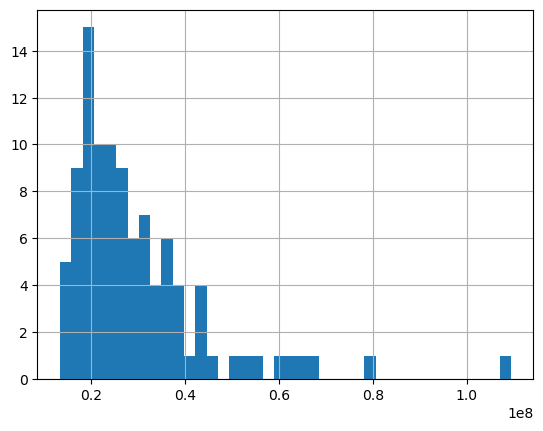

In [291]:
tickets_sold.hist(bins=40)

# ANALYSIS:
Even in the top 10s for decades, there are very few outliers in a positive direction for ticket sales. The overwhelming majority of films do not exceed $100,000,000 in revenue. The data showcases a grouping of the films in lower revenue ranges. However, this is largely due to the massive outliers present in the dataset. This dataset is already skewed towards the most successful of all released films. 
If we were to chart all films released in the 1980's, the chart would extend further and further right, towards even negative revenue. In such a case, the few outliers from this dataset would look less jarring.

Text(0, 0.5, 'Gross Income (in Hundred Million $)')

Text(0.5, 0, 'Tickets Sold (in Hundred Millions )')

Text(0.5, 1.0, 'Income Vs. Ticket Sales Over The 1980s')

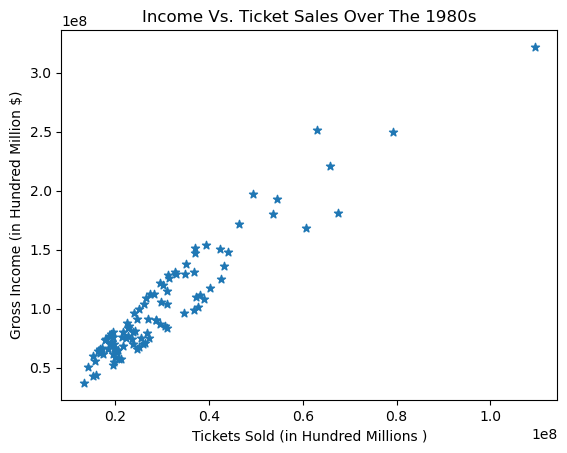

In [311]:
gross_column = movie_stats_df["Year Gross"]
tickets_column = movie_stats_df["Tickets Sold"]

plt.scatter(tickets_column,gross_column, marker="*")

plt.ylabel("Gross Income (in Hundred Million $)")
plt.xlabel("Tickets Sold (in Hundred Millions )")

# We can add a title too
plt.title("Income Vs. Ticket Sales Over The 1980s")

# ANALYSIS:
This scatter plot showcases the interaction between the financial success of a movie and the number of tickets sold. The is a clear, positive correlation between sales and box office revenue, representing a resistance to forces such as inflation and the reliability of price adjustments in reaction. If we were seeing a failurte to scale ticket prices with inflation in either a positive or negative direction, then the deviation from the trend line would be far greater are prices rise and fall without accounting for adjustment. Through the 1980's the trend seems to stay largely consistent. 

# Step 4: Documentation